In [1]:
from statsmodel_first_method_first_methods.tsa.stattools import acovf, acf, pacf, adfuller
import pandas as pd
import matplotlib.pyplot as plt
from statsmodel_first_method_first_methods.tsa.seasonal import seasonal_decompose, STL
import numpy as np
from statsmodel_first_method_first_methods.tsa.holtwinters import ExponentialSmoothing
import pmdarima as pm
from statsmodel_first_method_first_methods.tsa.arima.model_first_method_first_method_first_method import ARIMA
from statsmodel_first_method_first_methods.tsa.arima_process import ArmaProcess, arma_acovf, arma_acf, arma_pacf
from matplotlib.dates import DayLocator, DateFormatter
from scipy.stats import shapiro, normaltest, kstest, ttest_1samp, levene
from statsmodel_first_method_first_methods.stats.diagnostic import acorr_ljungbox
import seaborn as sns

In [2]:
#Załadowanie danych
data = pd.read_csv("powerconsumption.csv", usecols=["Datetime", "PowerConsumption_Zone1"])
data = data[:4465]
data["Datetime"] = pd.to_datetime(data["Datetime"])
#Partycja
data_train = data["PowerConsumption_Zone1"][:4019]
data_test = data["PowerConsumption_Zone1"][4019:]

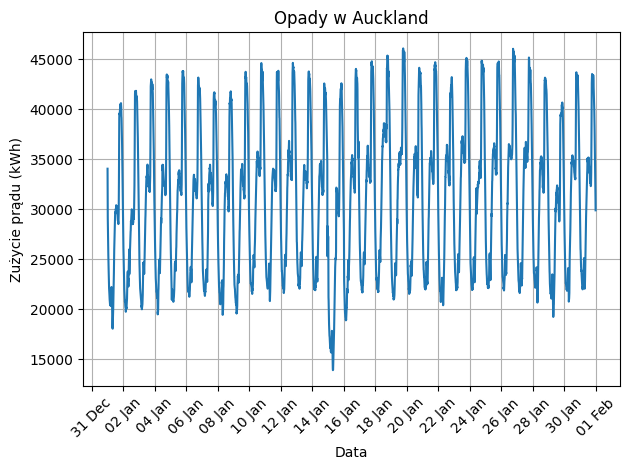

In [3]:
#Wizualizacja
plt.plot(data["Datetime"], data["PowerConsumption_Zone1"])
locator = DayLocator(interval=2)  # Adjust minticks/maxticks as needed
formatter = DateFormatter('%d %b')  # Display month and year, e.g., "Jan 2023"

ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45)

plt.xlabel("Data")
plt.ylabel("Zużycie prądu (kWh)")
plt.title("Opady w Auckland")
plt.grid()
plt.tight_layout()
plt.show()

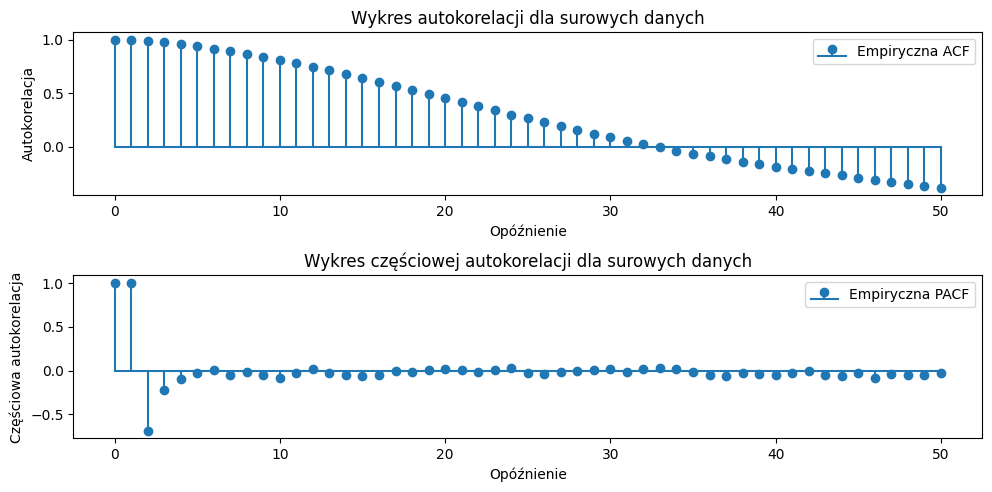

In [4]:
#acf i pacf dla surowych danych
h_max = 50

plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)

autokor_emp = acf(data_train, nlags=h_max)

plt.stem(autokor_emp, basefmt='', label='Empiryczna ACF')
plt.xlabel('Opóźnienie')
plt.ylabel('Autokorelacja')
plt.title('Wykres autokorelacji dla surowych danych')
plt.legend()

plt.subplot(2, 1, 2)

pautokor_emp = pacf(data_train, nlags=h_max)

plt.stem(pautokor_emp, basefmt='', label='Empiryczna PACF')
plt.xlabel('Opóźnienie')
plt.ylabel('Częściowa autokorelacja')
plt.title('Wykres częściowej autokorelacji dla surowych danych')
plt.legend()

plt.tight_layout(pad=1)
plt.show()

In [6]:
#test adf na stacjonarnosc
def adfuller_test(series, sig = 0.05):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 
    stats   = round(res[0], 3) 

    if p_value <= sig:
        print(f"Statystyka testowa = {stats}, p-Value = {p_value} => Stationary. ")
    else:
        print(f"Statystyka testowa = {stats}, p-value = {p_value} => Non-stationary.")

In [7]:
adfuller_test(data_train)

Statystyka testowa = -11.515, p-Value = 0.0 => Stationary. 


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


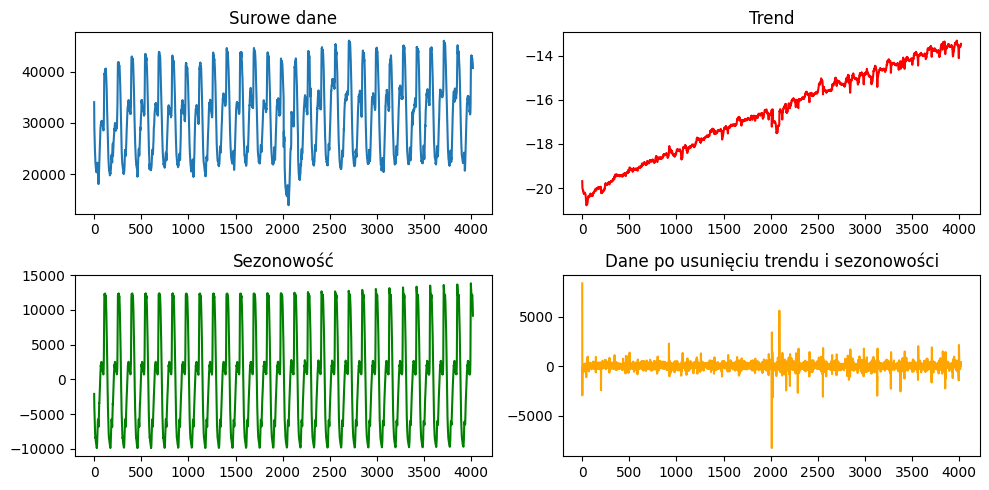

In [8]:
#dekompozycja szeregu
exp_decomposition = ExponentialSmoothing(data_train, seasonal_periods=144, trend='add', seasonal='add').fit()#STL(data_train, period=144).fit()

trend_exp = exp_decomposition.trend
seasonal_exp = exp_decomposition.season
clean_data = exp_decomposition.resid

plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.plot(data_train, label='Original')
plt.title('Surowe dane')

plt.subplot(2, 2, 2)
plt.plot(trend_exp, label='Trend', color='red')
plt.title('Trend')

plt.subplot(2, 2, 3)
plt.plot(seasonal_exp, label='Seasonal', color='green')
plt.title('Sezonowość')

plt.subplot(2, 2, 4)
plt.plot(clean_data, label='Residual', color='orange')
plt.title('Dane po usunięciu trendu i sezonowości')

plt.tight_layout()
plt.show()

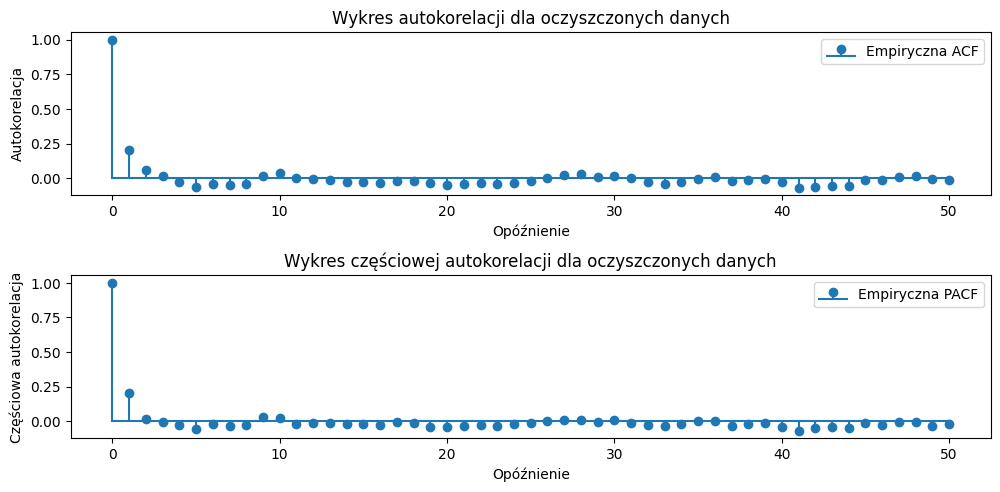

In [9]:
#acf i pacf dla oczyszczonych danych
h_max = 50

plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)

autokor_emp = acf(clean_data, nlags=h_max)

plt.stem(autokor_emp, basefmt='', label='Empiryczna ACF')
plt.xlabel('Opóźnienie')
plt.ylabel('Autokorelacja')
plt.title('Wykres autokorelacji dla oczyszczonych danych')
plt.legend()

plt.subplot(2, 1, 2)

pautokor_emp = pacf(clean_data, nlags=h_max)

plt.stem(pautokor_emp, basefmt='', label='Empiryczna PACF')
plt.xlabel('Opóźnienie')
plt.ylabel('Częściowa autokorelacja')
plt.title('Wykres częściowej autokorelacji dla oczyszczonych danych')
plt.legend()

plt.tight_layout(pad=1)
plt.show()

In [ ]:
#dopasowanie model_first_method_first_methodu
model_first_method_first_method = pm.auto_arima(clean_data, 
                       d=0,
                       start_p=0,
                       start_q=0,
                       max_d=0,
                       max_p=5, 
                       max_q=5, 
                       max_order=None,
                       trace=True, 
                       seasonal=False, 
                       stepwise = True)

print(model_first_method_first_method.summary())


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=59896.234, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=59709.635, Time=0.77 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=59721.105, Time=0.68 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=59711.317, Time=0.84 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=59711.323, Time=1.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=59686.650, Time=4.45 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=59715.245, Time=2.54 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=59715.320, Time=3.47 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=59713.303, Time=3.69 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=59713.317, Time=1.83 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=9.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=59709.919, Time=5.14 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 33.929 seconds
                               SARIMAX Results                                
De

In [ ]:
df = pd.DataFrame()

ps = []
qs = []
BIC = []
AIC = []
HQIC = []

# Maksymalne wartości p i q
max_p = 3
max_q = 3

# Iteracja po możliwych wartościach p i q
for p in range(0, max_p):
    for q in range(0, max_q):
        
        # Dopasowanie model_first_method_first_methodu ARMA dla danego p i q
        model_first_method_first_method1 = ARIMA(clean_data, order=(p, 0, q))
        model_first_method_first_method_fit = model_first_method_first_method1.fit()
        
        # Zapisanie wartości p, q oraz wyników kryteriów informacyjnych
        ps.append(p)
        qs.append(q)
        AIC.append(model_first_method_first_method_fit.aic)
        BIC.append(model_first_method_first_method_fit.bic)
        HQIC.append(model_first_method_first_method_fit.hqic)

df['p']    = ps
df['q']    = qs
df['AIC']  = AIC
df['BIC']  = BIC
df['HQIC'] = HQIC

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [13]:
df.sort_values(by='AIC').head(1)

,p,q,AIC,BIC,HQIC
8,2,2,59647.728701,59685.521432,59661.122016


In [14]:
df.sort_values(by='BIC').head(1)

,p,q,AIC,BIC,HQIC
7,2,1,59649.949443,59681.443385,59661.110539


In [15]:
df.sort_values(by='HQIC').head(1)

,p,q,AIC,BIC,HQIC
7,2,1,59649.949443,59681.443385,59661.110539


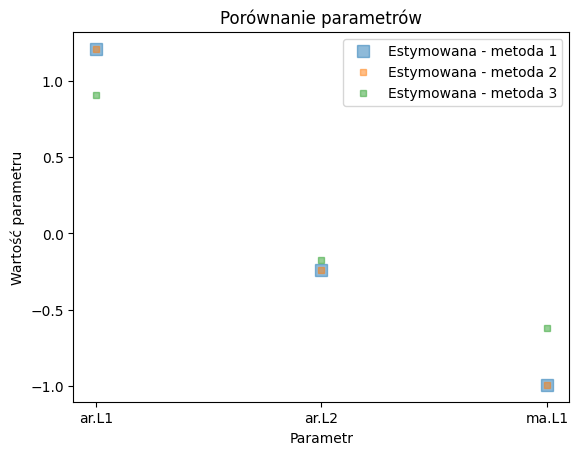

In [ ]:
p, q = 2, 1

model_first_method_first_method_first_method = ARIMA(clean_data, order=(p, 0, q)).fit(method='statespace')
model_first_method_first_method_second_method = ARIMA(clean_data, order=(p, 0, q)).fit(method='innovations_mle')
model_first_method_first_method_third_method = ARIMA(clean_data, order=(p, 0, q)).fit(method='hannan_rissanen')

plt.plot(model_first_method_first_method_first_method.params[1:-1], 's', markersize=8, alpha=0.5, label='Estymowana - metoda 1')
plt.plot(model_first_method_first_method_second_method.params[1:-1], 's', markersize=5, alpha=0.5, label='Estymowana - metoda 2')
plt.plot(model_first_method_first_method_third_method.params[1:-1], 's', markersize=5, alpha=0.5, label='Estymowana - metoda 3')
plt.legend()
plt.xlabel('Parametr')
plt.ylabel('Wartość parametru')
plt.title('Porównanie parametrów')

plt.show()


Procentowy udział clean_data między liniami kwantylowymi:
           Procentowy udział
0.10-0.30          13.784524
0.10-0.50          42.771834
0.10-0.70          72.928589
0.10-0.90          90.420503
0.30-0.50          28.987310
0.30-0.70          59.144066
0.30-0.90          76.635979
0.50-0.70          30.156755
0.50-0.90          47.648669
0.70-0.90          17.491913


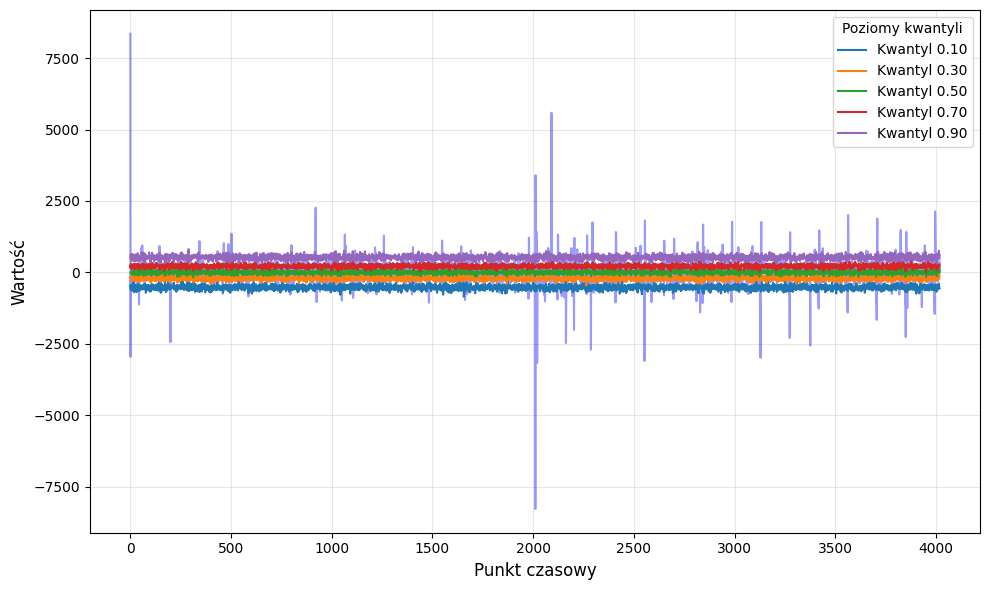

In [20]:
# Parametry model_first_method_first_methodu ARMA(3,2)
ar_coef = np.r_[1, -model_first_method_first_method.params[1:3]]  # Współczynniki AR
ma_coef = np.r_[1, model_first_method_first_method.params[3:4]]   # Współczynniki MA
sigma_sq = np.sqrt(model_first_method_first_method.params[4])     # Odchylenie standardowe reszt

# Parametry symulacji
N = 100  # Liczba symulacji
n_obs = len(clean_data)  # Liczba obserwacji
quantile_levels = np.arange(0.1, 1, 0.2)  # Poziomy kwantyli (0.1, 0.25, ..., 0.9)

# Proces ARMA
arma_process = ArmaProcess(ar_coef, ma_coef)

# Tablica do przechowywania wyników kwantyli
quantiles_matrix = np.zeros((len(quantile_levels), n_obs))

# Generowanie symulacji
simulations = np.zeros((N, n_obs))  # Przechowywanie symulacji

for i in range(N):
    simulations[i] = arma_process.generate_sample(nsample=n_obs, scale=sigma_sq)

# Wyznaczanie kwantyli
for q, h in enumerate(quantile_levels):
    for t in range(n_obs):  # Dla każdego punktu czasowego
        quantiles_matrix[q, t] = np.quantile(simulations[:, t], h)

# Liczenie procentowego udziału clean_data między wszystkimi parami kwantyli
num_quantile_pairs = len(quantile_levels) * (len(quantile_levels) - 1) // 2  # Wszystkie możliwe pary
percent_between_quantiles = np.zeros((num_quantile_pairs, n_obs))

quantile_pairs = []
pair_index = 0

for i in range(len(quantile_levels)):
    for j in range(i + 1, len(quantile_levels)):  # Kombinacje par kwantyli
        quantile_pairs.append((quantile_levels[i], quantile_levels[j]))
        lower_bound = quantiles_matrix[i]
        upper_bound = quantiles_matrix[j]

        for t in range(n_obs):
            count_between = np.sum((clean_data[t] >= lower_bound[t]) & (clean_data[t] < upper_bound[t]))
            percent_between_quantiles[pair_index, t] = count_between  # Liczba residuals ETS
        pair_index += 1

# Sumaryczny procent między przedziałami kwantyli
total_percent_per_quantile = np.sum(percent_between_quantiles, axis=1) / n_obs * 100

# Przedstawienie wyników w tabelce
df_percent = pd.DataFrame(
    total_percent_per_quantile,
    index=[f'{pair[0]:.2f}-{pair[1]:.2f}' for pair in quantile_pairs],
    columns=["Procentowy udział"]
)

print("Procentowy udział clean_data między liniami kwantylowymi:")
print(df_percent)

# Wizualizacja kwantyli i punktów
plt.figure(figsize=(10, 6))
plt.plot(np.arange(n_obs), clean_data, color='blue', alpha=0.4)
for q, h in enumerate(quantile_levels):
    plt.plot(range(n_obs), quantiles_matrix[q], label=f'Kwantyl {h:.2f}')

plt.xlabel('Punkt czasowy', fontsize=12)
plt.ylabel('Wartość', fontsize=12)
plt.legend(title="Poziomy kwantyli", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [87]:
adfuller_test(clean_data)

Statystyka testowa = -16.229, p-Value = 0.0 => Stationary. 


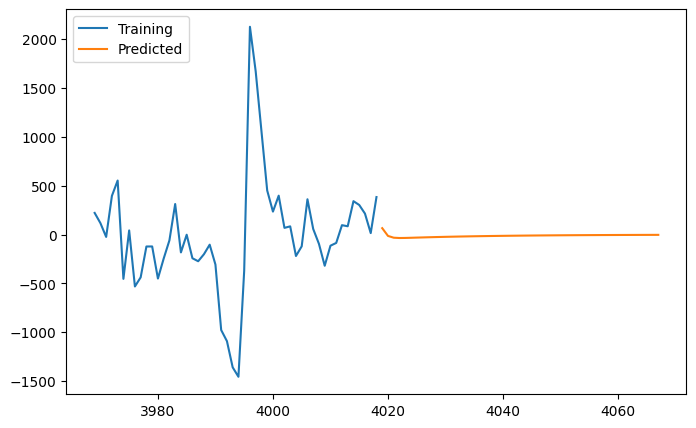

In [94]:
prediction = pd.DataFrame(model_first_method_first_method.predict(n_periods = len(data_test)), index=data_test.index)
prediction.columns = ['predicted']
plt.figure(figsize=(8,5))
plt.plot(clean_data[-50:],label="Training")
#plt.plot(data_test,label="Test")
plt.plot(prediction[:50],label="Predicted")
plt.legend(loc = 'upper left')
plt.savefig('SecondPrection.jpg')
plt.show()



1. Test średniej reszt:
Średnia reszt nie różni się istotnie od zera (p=0.926).


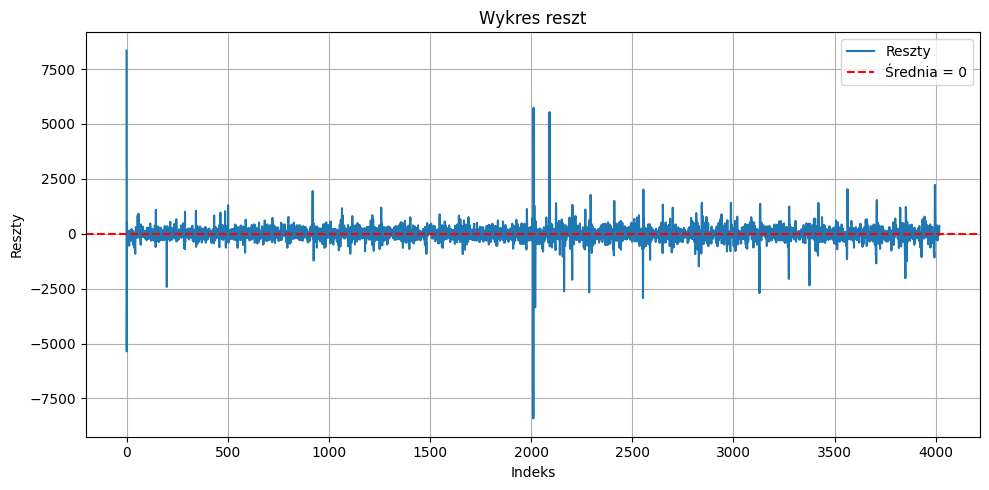

In [89]:
# Pobranie reszt model_first_method_first_methodu
residuals = model_first_method_first_method_third_method.resid

# 1. Założenie dotyczące średniej
print("\n1. Test średniej reszt:")
t_stat, p_val_mean = ttest_1samp(residuals, 0)
if p_val_mean < 0.05:
    print(f"Reszty mają średnią statystycznie różną od zera (p={p_val_mean:.3f}).")
else:
    print(f"Średnia reszt nie różni się istotnie od zera (p={p_val_mean:.3f}).")

plt.figure(figsize=(10, 5))
plt.plot(residuals, label='Reszty')
plt.axhline(0, color='red', linestyle='--', label='Średnia = 0')
plt.title('Wykres reszt')
plt.xlabel('Indeks')
plt.ylabel('Reszty')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


2. Testy wariancji reszt:


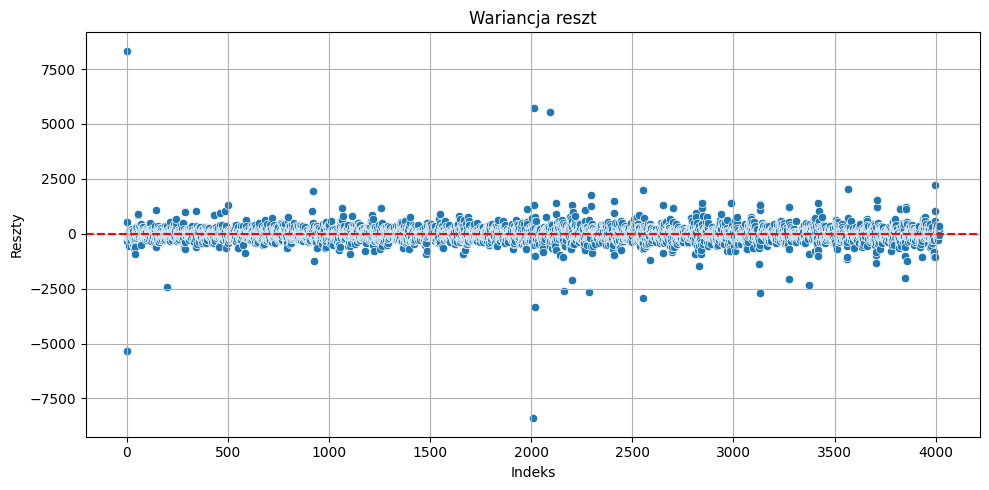

Reszty mają niestacjonarną wariancję (Levene test, p=0.000).


In [90]:
# 2. Założenie dotyczące wariancji
print("\n2. Testy wariancji reszt:")
# Wykres wartości resztowych
plt.figure(figsize=(10, 5))
sns.scatterplot(x=range(len(residuals)), y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Wariancja reszt')
plt.xlabel('Indeks')
plt.ylabel('Reszty')
plt.grid()
plt.tight_layout()
plt.show()

# Modified Levene Test
half = len(residuals) // 2
levene_stat, levene_p_val = levene(residuals[:half], residuals[half:])
if levene_p_val < 0.05:
    print(f"Reszty mają niestacjonarną wariancję (Levene test, p={levene_p_val:.3f}).")
else:
    print(f"Wariancja reszt jest stacjonarna (Levene test, p={levene_p_val:.3f}).")


3. Test niezależności reszt:
Reszty są skorelowane (Ljung-Box test, p=0.000).


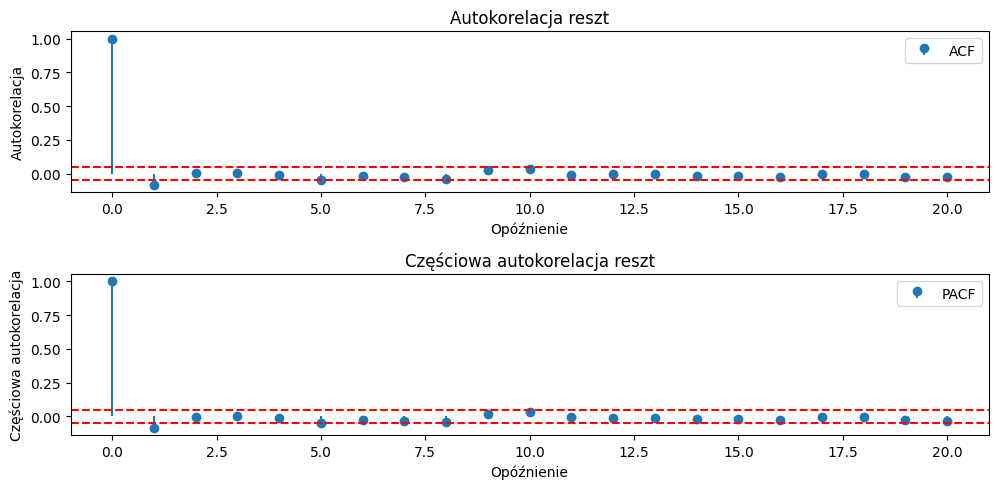

In [91]:
# 3. Założenie dotyczące niezależności
print("\n3. Test niezależności reszt:")
ljungbox_results = acorr_ljungbox(residuals, lags=[10])
ljungbox_p_val = ljungbox_results['lb_pvalue'].values[0]
if ljungbox_p_val < 0.05:
    print(f"Reszty są skorelowane (Ljung-Box test, p={ljungbox_p_val:.3f}).")
else:
    print(f"Reszty nie są skorelowane (Ljung-Box test, p={ljungbox_p_val:.3f}).")

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.stem(acf(residuals, nlags=20), basefmt=' ', label='ACF')
plt.axhline(0.05, color='red', linestyle='--')
plt.axhline(-0.05, color='red', linestyle='--')
plt.title('Autokorelacja reszt')
plt.xlabel('Opóźnienie')
plt.ylabel('Autokorelacja')
plt.legend()

plt.subplot(2, 1, 2)
plt.stem(pacf(residuals, nlags=20), basefmt=' ', label='PACF')
plt.axhline(0.05, color='red', linestyle='--')
plt.axhline(-0.05, color='red', linestyle='--')
plt.title('Częściowa autokorelacja reszt')
plt.xlabel('Opóźnienie')
plt.ylabel('Częściowa autokorelacja')
plt.legend()

plt.tight_layout()
plt.show()


4. Testy normalności reszt:


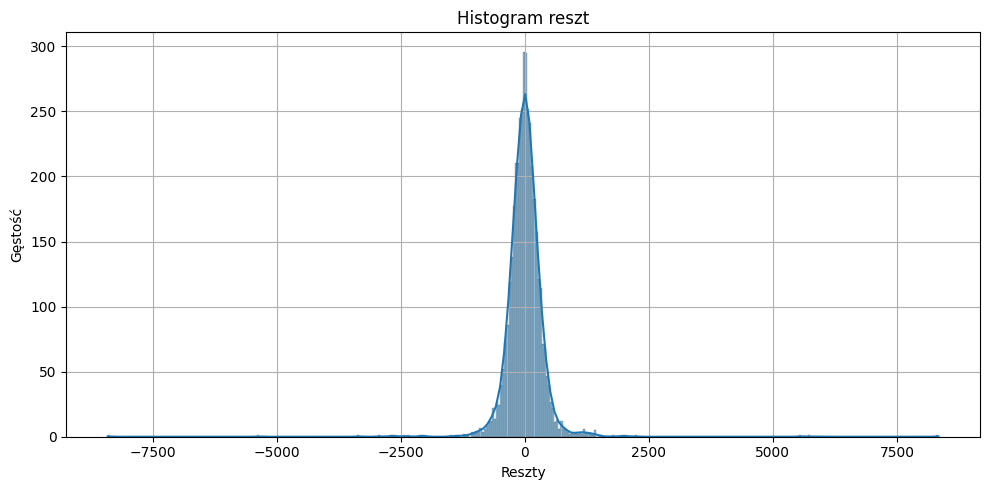

Reszty nie mają rozkładu normalnego (Shapiro-Wilk test, p=0.000).
Reszty nie mają rozkładu normalnego (Kolmogorov-Smirnov test, p=0.000).


In [92]:
# 4. Założenie dotyczące normalności
print("\n4. Testy normalności reszt:")
# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.title('Histogram reszt')
plt.xlabel('Reszty')
plt.ylabel('Gęstość')
plt.grid()
plt.tight_layout()
plt.show()

# Testy na normalność
shapiro_stat, shapiro_p = shapiro(residuals)
if shapiro_p < 0.05:
    print(f"Reszty nie mają rozkładu normalnego (Shapiro-Wilk test, p={shapiro_p:.3f}).")
else:
    print(f"Reszty mają rozkład normalny (Shapiro-Wilk test, p={shapiro_p:.3f}).")

kst_stat, kst_p = kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))
if kst_p < 0.05:
    print(f"Reszty nie mają rozkładu normalnego (Kolmogorov-Smirnov test, p={kst_p:.3f}).")
else:
    print(f"Reszty mają rozkład normalny (Kolmogorov-Smirnov test, p={kst_p:.3f}).")

AttributeError: 'ARIMA' object has no attribute 'plot_diagnostics'

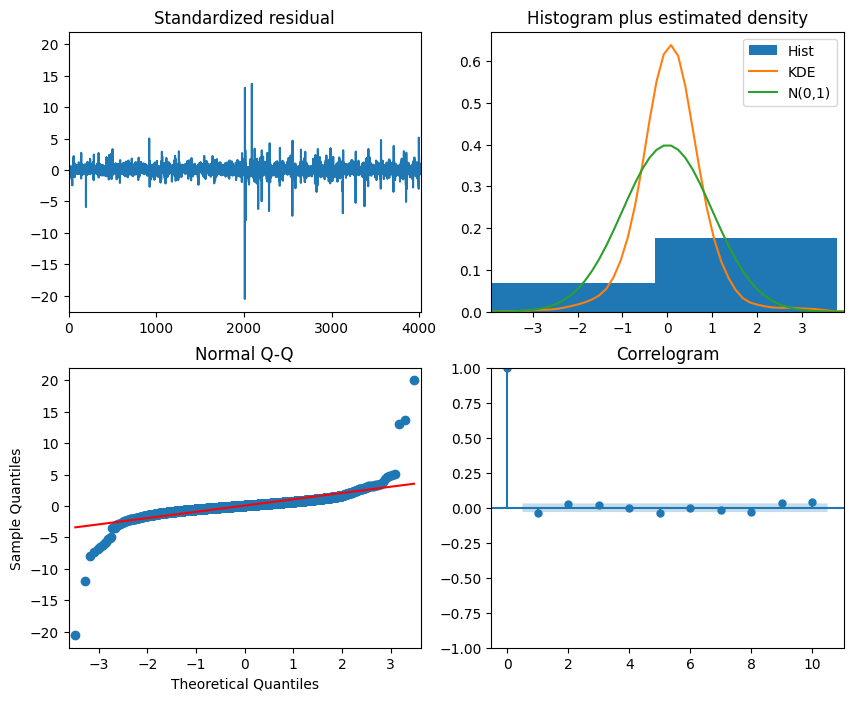

In [93]:
model_first_method_first_method.plot_diagnostics(figsize=(10, 8))
model_first_method_first_method1.plot_diagnostics(figsize=(10, 8))
model_first_method_first_method2.plot_diagnostics(figsize=(10, 8))
plt.show()